In [83]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

#Dogs face detection imports:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image             
from tqdm import tqdm
from keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image
import numpy as np

In [84]:
import os
#print(os.listdir('Data_train/dataset/training_set/dogs'))

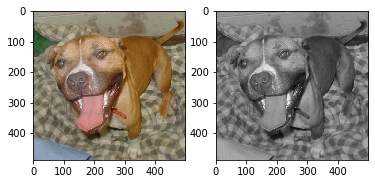

In [85]:
im = cv2.imread("Data_train/dataset/training_set/dogs/dog.6.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(im)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,2)
plt.imshow(im, cmap="gray")

[[[ 79  99 104]
  [ 40  65  69]
  [ 26  54  55]
  ...
  [ 52  87  91]
  [ 42  77  80]
  [ 69 101 106]]

 [[ 89 108 111]
  [ 47  68  70]
  [ 25  48  50]
  ...
  [ 52  87  90]
  [ 41  76  79]
  [ 67 100 103]]

 [[ 87 106 109]
  [ 47  68  70]
  [ 32  56  56]
  ...
  [ 51  86  89]
  [ 41  76  79]
  [ 65  98 101]]

 ...

 [[ 79 125 159]
  [ 72 118 152]
  [ 69 115 149]
  ...
  [  0   0   4]
  [  0   5   9]
  [  4  12  19]]

 [[ 82 129 161]
  [ 76 123 155]
  [ 71 118 150]
  ...
  [  0   1   5]
  [  3  12  16]
  [  9  17  24]]

 [[ 84 131 163]
  [ 76 123 155]
  [ 73 120 152]
  ...
  [  0   8  12]
  [  8  17  21]
  [ 10  18  25]]]


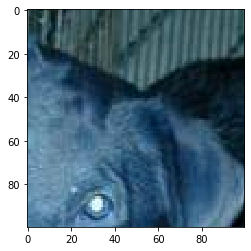

In [86]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 3)
    x,y,w,h = faces[0]
    face = img[y:y+h,x:x+w]
    plt.imshow(face)
    return face
h = face_detector("Data_train/dataset/training_set/dogs/dog.1.jpg")
print(h)
plt.imshow(h)

In [5]:
ResNet50_model_ = ResNet50(weights='imagenet')

In [6]:
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

In [12]:

def ResNet50_predict_labels(img_path):
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model_.predict(img))
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [14]:
for i in range(1,50): 
    img_path=f"Data_train/dataset/training_set/dogs/dog.{i}.jpg"
    print(dog_detector(img_path))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True


# Funcion que genera el np array

Tamaño de la foto 28,28, 3 (por incluir color) 

In [327]:
def createnp(path):
    data_path = path
    data_dir_list = os.listdir(data_path)[:7000]

    img_rows=256
    img_cols=256
    num_channel=1

    num_epoch=10

    img_data_list=[]

    for dataset in data_dir_list:
        #print(dataset)
        input_img=cv2.imread(data_path+'/'+ dataset)
        #print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(60,60))
        #print(input_img_resize.shape)
        img_data_list.append(input_img_resize)


    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    img_data = img_data/255
    return img_data
img_data = createnp('Data_train/dataset/training_set/dogs')
img_test = createnp('Data_train/dataset/training_set/dogs')
print(img_data.shape)

(3615, 60, 60)


# Simplest possible autoencoder

(2000, 12288)
(2000, 12288)
Train on 2000 samples, validate on 2000 samples
Epoch 1/25
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 2/25
2000/2000 [==============================] - 2s 843us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 3/25
2000/2000 [==============================] - 2s 954us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 4/25
2000/2000 [==============================] - 2s 871us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 5/25
2000/2000 [==============================] - 2s 806us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 6/25
2000/2000 [==============================] - 2s 841us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 7/25
2000/2000 [==============================] - 2s 856us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 8/25
2000/2000 [==============================] - 2s 859us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 9/25
2000/2000 [==============================] - 2s 929us/step - loss: 0.6931 - val_los

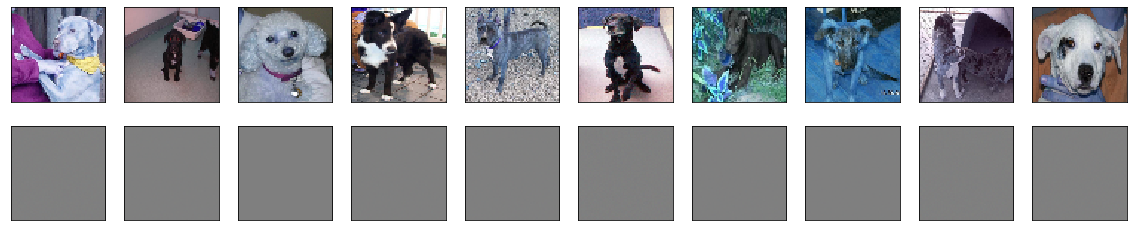

In [310]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(12288,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(12288, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
import numpy as np
(x_train), (x_test) = img_data,img_test
'''x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.'''
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional autoencoder

In [328]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(60, 60, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [329]:
from keras.datasets import mnist
import numpy as np

(x_train), (x_test) = img_data,img_test

'''x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.'''
x_train = np.reshape(x_train, (len(x_train), 60, 60, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 60, 60, 1))  # adapt this if using `channels_first` image data format
print (x_train.shape)
print (x_test.shape)

(3615, 60, 60, 1)
(3615, 60, 60, 1)


In [330]:
'''TERMINAL:
tensorboard --logdir=/tmp/autoencoder'''

'TERMINAL:\ntensorboard --logdir=/tmp/autoencoder'

In [331]:
from keras.callbacks import TensorBoard
print(x_train.shape)
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

(3615, 60, 60, 1)
Train on 3615 samples, validate on 3615 samples
Epoch 1/25
3615/3615 [==============================] - 14s 4ms/step - loss: 0.6835 - val_loss: 0.6577
Epoch 2/25
3615/3615 [==============================] - 15s 4ms/step - loss: 0.6508 - val_loss: 0.6338
Epoch 3/25
3615/3615 [==============================] - 18s 5ms/step - loss: 0.6332 - val_loss: 0.6232
Epoch 4/25
3615/3615 [==============================] - 21s 6ms/step - loss: 0.6254 - val_loss: 0.6208
Epoch 5/25
3615/3615 [==============================] - 19s 5ms/step - loss: 0.6211 - val_loss: 0.6155
Epoch 6/25
3615/3615 [==============================] - 18s 5ms/step - loss: 0.6181 - val_loss: 0.6227
Epoch 7/25
3615/3615 [==============================] - 18s 5ms/step - loss: 0.6156 - val_loss: 0.6147
Epoch 8/25
3615/3615 [==============================] - 29s 8ms/step - loss: 0.6131 - val_loss: 0.6123
Epoch 9/25
3615/3615 [==============================] - 19s 5ms/step - loss: 0.6117 - val_loss: 0.6075
Epoch 1

In [332]:
decoded_imgs = autoencoder.predict(x_test)

'''n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(60, 60))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(60, 60))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()'''

'n = 10\nplt.figure(figsize=(20, 4))\nfor i in range(n):\n    # display original\n    ax = plt.subplot(2, n, i)\n    plt.imshow(x_test[i].reshape(60, 60))\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\n\n    # display reconstruction\n    ax = plt.subplot(2, n, i + n)\n    plt.imshow(decoded_imgs[i].reshape(60, 60))\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\nplt.show()'

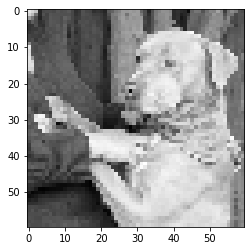

In [333]:
plt.imshow(x_test[0].reshape(60,60))

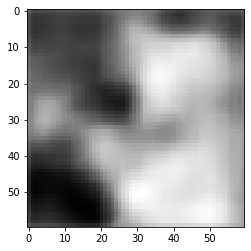

In [334]:

plt.imshow(decoded_imgs[0].reshape(60,60))